In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import random

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
combine=[train,test]

In [5]:
train["Name"].dtype

dtype('O')

In [6]:
train["Name"][0]

'Braund, Mr. Owen Harris'

In [7]:
for df in combine:
    df["Title"]=df["Name"].astype("string").str.split(",").str[1].str.split(".").str[0].str.strip()

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [10]:
pd.crosstab(train["Title"],train["Survived"])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,127


In [11]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [12]:
title_map={"Mr":1,"Rare":2,"Master":3,"Miss":4,"Mrs":5}
for df in combine:
    df["Title"]=df["Title"].map(title_map)
    df["Title"].fillna(0,inplace=True)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
passenger=test["PassengerId"].copy()

In [15]:
for df in combine:
    df.drop(["Name","PassengerId","Ticket","Cabin"],axis=1,inplace=True)

In [16]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,5
2,1,3,female,26.0,0,0,7.9250,S,4
3,1,1,female,35.0,1,0,53.1000,S,5
4,0,3,male,35.0,0,0,8.0500,S,1


In [17]:
for df in combine:
    df["Sex"]=df["Sex"].map({"male":0,"female":1})

In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,5
2,1,3,1,26.0,0,0,7.9250,S,4
3,1,1,1,35.0,1,0,53.1000,S,5
4,0,3,0,35.0,0,0,8.0500,S,1


In [19]:
train.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889,891.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644,NaN
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,NaN,2.304153
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,NaN,1.624453
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN,1.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,NaN,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,NaN,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,NaN,4.000000


In [20]:
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
train[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


(array([[233.,  70.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.],
        [732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 2 BarContainer objects>)

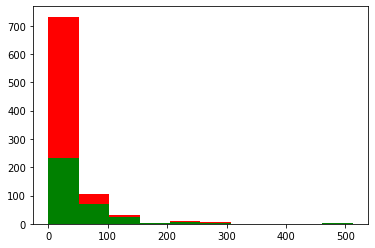

In [22]:
plt.hist(x=[train[train["Survived"]==1]["Fare"],train[train["Survived"]==0]["Fare"]],stacked=True,color=['g','r'],label=['Survived','Dead'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

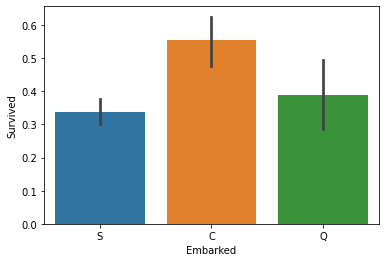

In [23]:
sns.barplot(x="Embarked",y="Survived",data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

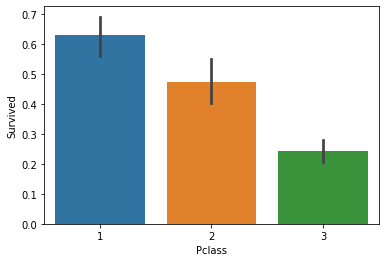

In [24]:
sns.barplot(x="Pclass",y="Survived",data=train)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

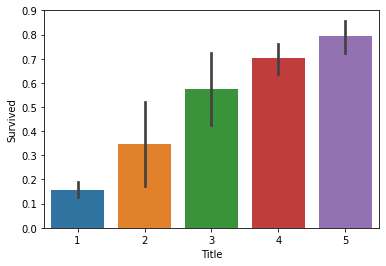

In [25]:
sns.barplot(x="Title",y="Survived",data=train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

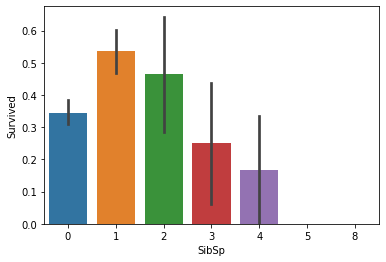

In [26]:
sns.barplot(x="SibSp",y="Survived",data=train)

In [27]:
pd.crosstab(train["SibSp"],train["Survived"])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [28]:
pd.crosstab(train["Parch"],train["Survived"])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [29]:
for df in combine:
    df["Family"]=df["SibSp"]+df["Parch"]

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0,3,0,22.0,1,0,7.2500,S,1,1
1,1,1,1,38.0,1,0,71.2833,C,5,1
2,1,3,1,26.0,0,0,7.9250,S,4,0
3,1,1,1,35.0,1,0,53.1000,S,5,1
4,0,3,0,35.0,0,0,8.0500,S,1,0


In [31]:
pd.crosstab(train["Family"],train["Survived"])

Survived,0,1
Family,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


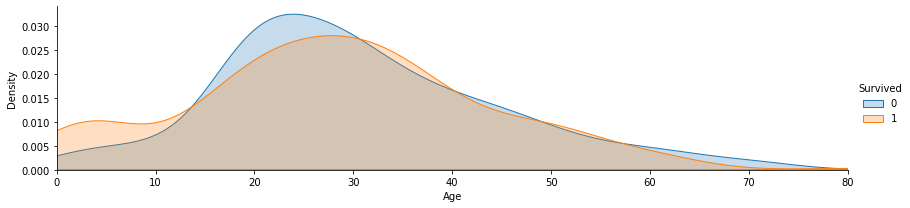

In [32]:
a=sns.FacetGrid(train,hue="Survived",aspect=4)
a.map(sns.kdeplot,"Age",shade=True)
a.set(xlim=(0,train["Age"].max()))
a.add_legend()

In [33]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Family'],
      dtype='object')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

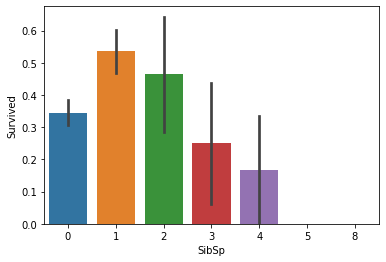

In [34]:
sns.barplot(x="SibSp",y="Survived",data=train)

<AxesSubplot:xlabel='Family', ylabel='Survived'>

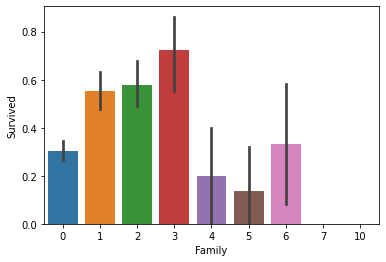

In [35]:
sns.barplot(x="Family",y="Survived",data=train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

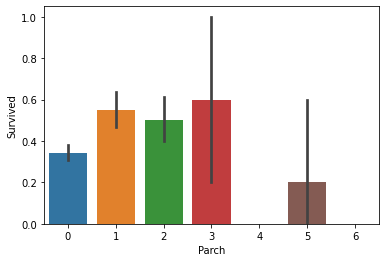

In [36]:
sns.barplot(x="Parch",y="Survived",data=train)

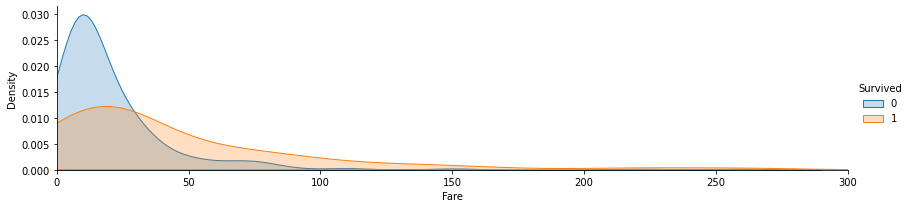

In [37]:
a=sns.FacetGrid(train,hue="Survived",aspect=4)
a.map(sns.kdeplot,"Fare",shade=True)
a.set(xlim=(0,300))
a.add_legend()

In [38]:
train["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [39]:
embarked=pd.get_dummies(train["Embarked"])
train=pd.concat([train,embarked],axis=1)
embarked=pd.get_dummies(test["Embarked"])
test=pd.concat([test,embarked],axis=1)
combine=[train,test]

In [40]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,C,Q,S
0,0,3,0,22.0,1,0,7.2500,S,1,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,5,1,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,4,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,5,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,1,0,0,0,1


In [41]:
for data in combine:
    print(data)
    data.drop(["SibSp","Parch","Embarked"],axis=1,inplace=True)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title  \
0           0       3    0  22.0      1      0   7.2500        S      1   
1           1       1    1  38.0      1      0  71.2833        C      5   
2           1       3    1  26.0      0      0   7.9250        S      4   
3           1       1    1  35.0      1      0  53.1000        S      5   
4           0       3    0  35.0      0      0   8.0500        S      1   
..        ...     ...  ...   ...    ...    ...      ...      ...    ...   
886         0       2    0  27.0      0      0  13.0000        S      2   
887         1       1    1  19.0      0      0  30.0000        S      4   
888         0       3    1   NaN      1      2  23.4500        S      4   
889         1       1    0  26.0      0      0  30.0000        C      1   
890         0       3    0  32.0      0      0   7.7500        Q      1   

     Family  C  Q  S  
0         1  0  0  1  
1         1  1  0  0  
2         0  0  0  1  
3      

In [42]:
test.head()

,Pclass,Sex,Age,Fare,Title,Family,C,Q,S
0,3,0,34.5,7.8292,1,0,0,1,0
1,3,1,47.0,7.0000,5,1,0,0,1
2,2,0,62.0,9.6875,1,0,0,1,0
3,3,0,27.0,8.6625,1,0,0,0,1
4,3,1,22.0,12.2875,5,2,0,0,1


In [43]:
print(combine[0])

     Survived  Pclass  Sex   Age     Fare  Title  Family  C  Q  S
0           0       3    0  22.0   7.2500      1       1  0  0  1
1           1       1    1  38.0  71.2833      5       1  1  0  0
2           1       3    1  26.0   7.9250      4       0  0  0  1
3           1       1    1  35.0  53.1000      5       1  0  0  1
4           0       3    0  35.0   8.0500      1       0  0  0  1
..        ...     ...  ...   ...      ...    ...     ... .. .. ..
886         0       2    0  27.0  13.0000      2       0  0  0  1
887         1       1    1  19.0  30.0000      4       0  0  0  1
888         0       3    1   NaN  23.4500      4       3  0  0  1
889         1       1    0  26.0  30.0000      1       0  1  0  0
890         0       3    0  32.0   7.7500      1       0  0  1  0

[891 rows x 10 columns]


In [44]:
print(train)

     Survived  Pclass  Sex   Age     Fare  Title  Family  C  Q  S
0           0       3    0  22.0   7.2500      1       1  0  0  1
1           1       1    1  38.0  71.2833      5       1  1  0  0
2           1       3    1  26.0   7.9250      4       0  0  0  1
3           1       1    1  35.0  53.1000      5       1  0  0  1
4           0       3    0  35.0   8.0500      1       0  0  0  1
..        ...     ...  ...   ...      ...    ...     ... .. .. ..
886         0       2    0  27.0  13.0000      2       0  0  0  1
887         1       1    1  19.0  30.0000      4       0  0  0  1
888         0       3    1   NaN  23.4500      4       3  0  0  1
889         1       1    0  26.0  30.0000      1       0  1  0  0
890         0       3    0  32.0   7.7500      1       0  0  1  0

[891 rows x 10 columns]


In [45]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: 'bool' = True, labels=None, retbins: 'bool' = False, precision: 'int' = 3, include_lowest: 'bool' = False, duplicates: 'str' = 'raise', ordered: 'bool' = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values 

In [46]:
pd.qcut(train["Fare"],4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [47]:
for df in combine:
    df["Fare"].fillna(df["Fare"].median(),inplace=True)

In [48]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [49]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Title,Family,C,Q,S
0,0,3,0,22.0,0,1,1,0,0,1
1,1,1,1,38.0,3,5,1,1,0,0
2,1,3,1,26.0,1,4,0,0,0,1
3,1,1,1,35.0,3,5,1,0,0,1
4,0,3,0,35.0,1,1,0,0,0,1


In [50]:
for df in combine:
    df["Age"].fillna(df["Age"].median(),inplace=True)

In [51]:
pd.cut(train["Age"],5)

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888    (16.336, 32.252]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [52]:
pd.crosstab(train["Fare"],train["Survived"])

Survived,0,1
Fare,,
0,179,44
1,150,67
2,127,102
3,93,129


In [53]:
test.head()

,Pclass,Sex,Age,Fare,Title,Family,C,Q,S
0,3,0,34.5,0,1,0,0,1,0
1,3,1,47.0,0,5,1,0,0,1
2,2,0,62.0,1,1,0,0,1,0
3,3,0,27.0,1,1,0,0,0,1
4,3,1,22.0,1,5,2,0,0,1


In [54]:
train[["Fare","Survived"]].groupby(["Fare"],as_index=False).mean()

,Fare,Survived
0,0,0.197309
1,1,0.308756
2,2,0.445415
3,3,0.581081


In [55]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 1
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
    dataset["Age"]=dataset["Age"].astype(int)

In [56]:
train[["Age","Survived"]].groupby(["Age"],as_index=False).mean()

,Age,Survived
0,0,0.550000
1,1,0.434783
2,2,0.404255
3,3,0.344168
4,4,0.090909


<AxesSubplot:xlabel='Age', ylabel='Survived'>

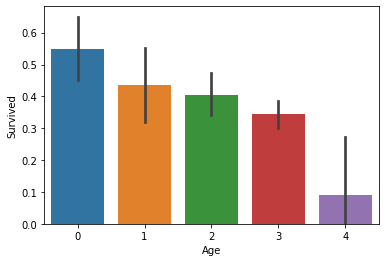

In [57]:
sns.barplot(x="Age",y="Survived",data=train)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

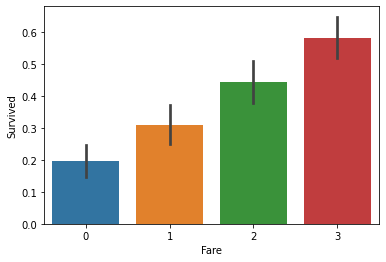

In [58]:
sns.barplot(x="Fare",y="Survived",data=train)

In [59]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` para

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

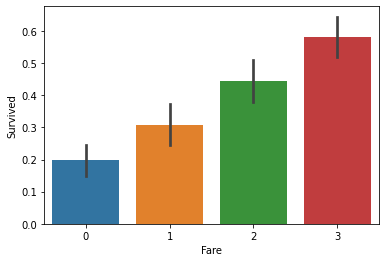

In [60]:
sns.barplot(x="Fare",y="Survived",data=train)

In [61]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
    

In [62]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Family', 'C', 'Q',
       'S'],
      dtype='object')

In [63]:
def correlation_heatmap(df):
    hm,ax=plt.subplots(figsize=(12,8))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    hm=sns.heatmap(df.corr(),cmap=colormap,square=True,cbar_kws={'shrink': .9},ax=ax,
                   annot=True,linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title('Paerson Correlation of Features',y=1.05,size=15)

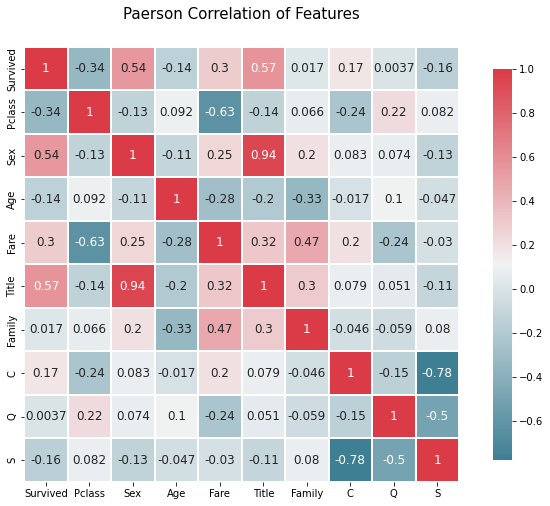

In [64]:
correlation_heatmap(train)

In [65]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [66]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
train1=pd.DataFrame(st.fit_transform(train),columns=train.columns)

In [67]:
test1=pd.DataFrame(st.fit_transform(test),columns=test.columns)
X_train = train1.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test1.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [68]:
train1.head()

,Survived,Pclass,Sex,Age,Fare,Title,Family,C,Q,S
0,-0.789272,0.827377,-0.737695,0.668281,-1.346777,-0.803277,0.059160,-0.482043,-0.307562,0.619306
1,1.266990,-1.566107,1.355574,-0.299911,1.337738,1.660474,0.059160,2.074505,-0.307562,-1.614710
2,1.266990,0.827377,1.355574,0.668281,-0.451938,1.044536,-0.560975,-0.482043,-0.307562,0.619306
3,1.266990,-1.566107,1.355574,-0.299911,1.337738,1.660474,0.059160,-0.482043,-0.307562,0.619306
4,-0.789272,0.827377,-0.737695,-0.299911,-0.451938,-0.803277,-0.560975,-0.482043,-0.307562,0.619306


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.86

In [71]:
submission = pd.DataFrame({
        "PassengerId": passenger,
        "Survived": Y_pred
    })

In [72]:
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [73]:
submission.to_csv('SubmissionTitanic.csv',index=False)